In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def generate_sample(mean, var, corr, n):
    cov_matrix = np.asarray([[var[0], corr * np.sqrt(var[0] * var[1])],
                             [corr * np.sqrt(var[0] * var[1]), var[1]]])
    sample = np.random.multivariate_normal(mean=mean, cov=cov_matrix, size=n)
    
    return sample

In [3]:
def estimate(e, sigma, corr, lim=1000):
    est = []
    est_correct = []
    for n in range(1, lim, 10):
        sample = generate_sample(e, sigma, corr, n)
        est.append(np.mean(sample[:, 0]) / np.mean(sample[:, 1]))
        est_correct.append(np.mean(sample[:, 0] / sample[:, 1]))
    
    plt.figure(figsize=(10, 7))
    plt.plot([i for i in range(1, lim, 10)], est)
    plt.plot([i for i in range(1, lim, 10)], est_correct)
    plt.legend(["Оценка mean(x) / mean(y)", "Оценка mean(x / y)"])
    plt.xlabel("Размер выборки")
    plt.show()

Для двумерного нормального распределения $(x, y)$, где $x \sim \mathcal{N}(6, 1)$, $y \sim \mathcal{N}(-2, 0.5)$, $corr(x, y) = 0.7$, были сгенерированы случайные выборки размером от $1$ до $1000$ с шагом $10$. Для каждой выборки сравнивалось отношение $\frac{\bar{x}}{\bar{y}}$ и выборочное среднее для $\frac{x}{y}$. В результате получилось, что эти оценки не совпадают. Так как выборочное среднее для $\frac{x}{y}$ в пределе стремится к $\mathbb{E}\frac{x}{y}$, оценку $\frac{\bar{x}}{\bar{y}}$ можно считать несостоятельной для $\mathbb{E}\frac{x}{y}$

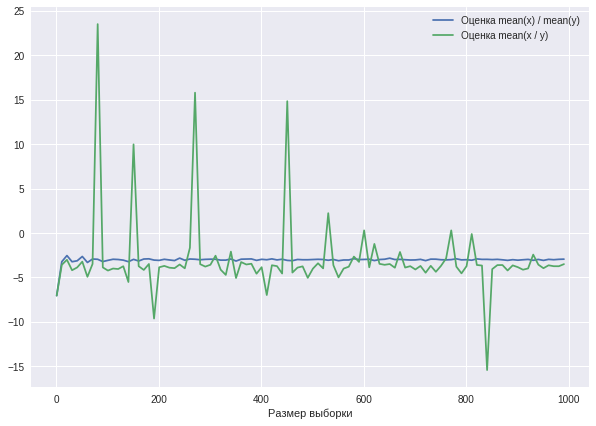

In [4]:
estimate([6, -2], [1, 0.5], 0.7)